### Support vector machines

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
from sklearn.datasets._samples_generator import make_blobs

(50, 2)
[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1
 0 1 0 1 0 1 1 0 1 1 0 1 0]


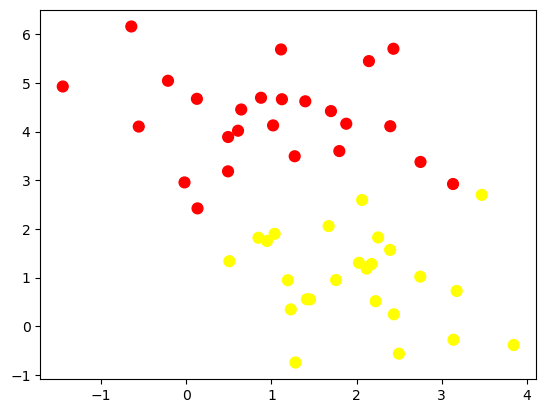

In [31]:
# generate the data for the clustering
x, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.95)
print(x.shape)
print(y)
plt.scatter(x[:,0], x[:,1], c=y, s=60, cmap='autumn')

(-1.0, 3.5)

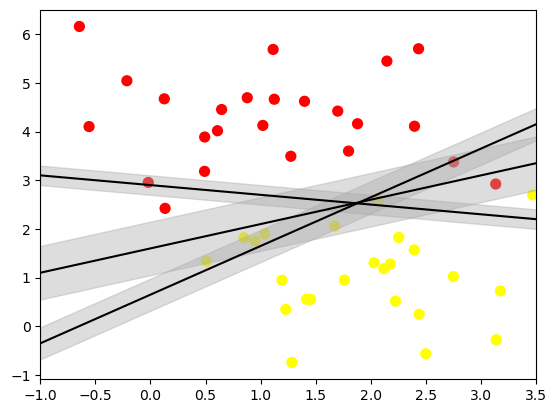

In [32]:
# Lets try to see the margins of the data
xfit = np.linspace(-1, 3.5)
plt.scatter(x[:,0], x[:,1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [33]:
# let;s build a SVM-C model to classify the data:
from sklearn.svm import SVC # "Support vector classifier"
# C is the regularization parameter of the model. 
# It is basically the inverse of the regularization strength it must be strictly positive
# the penaly is a l2 penalty
# The smaller the value of C, the more the model will try to maximize the margin
# The larger the value of C, the more the model will try to minimize the margin
# kernel is the kernel to be used in the algorithm.
# The most common ones are: linear, polynomial, rbf, sigmoid
# degree is the degree of the polynomial kernel function ('poly')
# gamma is the kernel coefficient for 'rbf', 'poly' and 'sigmoid'. 
# If gamma='scale'(default) then it is 1/(n_features * X.var()) if gamma='auto' then it is 1/n_features
# coef0 is the independent term in the kernel function
model = SVC(kernel='linear', C=.1)
model.fit(x, y)

SVC(C=0.1, kernel='linear')

In [34]:
# The provided Python code is a function named plot_svc_decision_function. 
# This function is used to visualize the decision boundary of a Support Vector Machine (SVM) model. 
# The function takes three parameters: model, ax, and plot_support.
# The model parameter is the trained SVM model. The ax parameter is an instance of matplotlib's Axes class. 
# If ax is not provided, the function uses plt.gca() to get the current Axes instance on the current figure. 
# The plot_support parameter is a boolean that determines whether or not to plot the support vectors of the SVM model.
# The function first gets the x and y limits of the current axes instance. 
# It then creates a grid of points within these limits using np.linspace and np.meshgrid. np.linspace 
# is a function that returns evenly spaced numbers over a specified interval. It's used here to generate 30 points between the x and y limits. 
# np.meshgrid is then used to create a two-dimensional grid of these points.
# The grid of points is reshaped into a 2D array and passed to the decision_function of the SVM model. 
# This function returns the distance of each point in the grid to the decision boundary of the SVM model. 
# The distances are reshaped to match the shape of the grid and stored in P.
# The function then uses ax.contour to draw the decision boundary and margins of the SVM model. 
# The decision boundary is where the model makes its decisions, and the margins are the distances 
# from the decision boundary to the nearest data points of each class.
# If plot_support is True, the function plots the support vectors of the SVM model. 
# Support vectors are the data points that lie closest to the decision boundary and influence its orientation and location.
# Finally, the function sets the x and y limits of the axes instance to their original values. This ensures that the plot is properly scaled.
# The second part of the code is the implementation of the linspace function from the numpy library. 
# This function generates a sequence of evenly spaced values between a start and stop value. It's used in the plot_svc_decision_function to generate the x and y coordinates for the grid of points.
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    # 
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

[[ 2.3956452   4.10888698]
 [ 1.79748447  3.59873056]
 [ 1.2736844   3.49239638]
 [ 0.13287362  2.42203068]
 [ 3.13253697  2.92213994]
 [ 2.75045017  3.37537334]
 [ 0.4910052   3.18218675]
 [-0.01985524  2.95477029]
 [ 1.03805253  1.8993928 ]
 [ 1.67224942  2.05898648]
 [ 2.06524254  2.59424063]
 [ 2.25312875  1.82547074]
 [ 0.50657909  1.3373068 ]
 [ 0.94837517  1.75344882]
 [ 0.84830677  1.81859053]
 [ 3.46910711  2.69875838]]


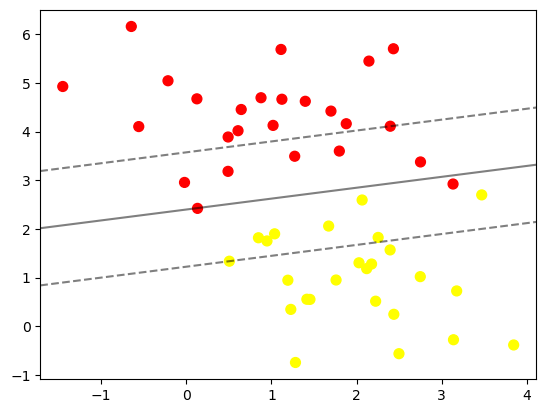

In [35]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
# The support vectors are stored in the support_vectors_ attribute of the SVM model.
# This attribute is a two-dimensional array where each row represents a support vector.
# suppoort vector is the point that is closest to the decision boundary
print(model.support_vectors_)

array([[-0.6446866 ,  6.15702395],
       [ 0.13287362,  2.42203068],
       [ 3.13253697,  2.92213994],
       [ 2.06524254,  2.59424063],
       [ 3.46910711,  2.69875838]])

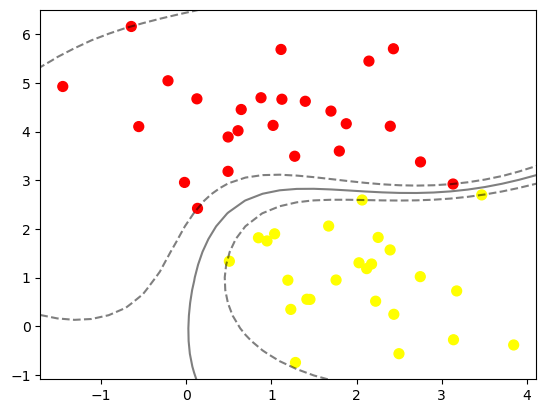

In [37]:
# using RBF kernel
r = np.exp(-(x ** 2).sum(1))
# In sckit-learn, we can simply apply kernalized SVM by changin the linear kernal to an RBF(radial basis function) kernel, using the kernel='rbf' parameter
# The RBF kernel is defined as K(x, x') = exp(-gamma * ||x - x'||^2)
# The gamma parameter is a hyperparameter that controls the influence of individual training samples.
# The larger the value of gamma, the more the model will try to fit the training data exactly.
# The smaller the value of gamma, the more the model will try to generalize the training data.
# The gamma parameter can be set manually or optimized using cross-validation.
clf = SVC(kernel='rbf', C=1E6)
clf.fit(x, y)

plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none')
clf.support_vectors_

In [45]:
fignum = 1
# Data:
# our dataste and targets
X = np.c_[(.4,-.7),
          (-1.5,-1),
          (-1.4,-.9),
          (-1.3,-1.2),
          (-1.1,-.2),
          (-1.2,-.4),
          (-.5,1.2),
          (-1.5,2.1),
          (1,1),
          (.9,1),
          (-1,-1.5),
          (-1.5,-1.5),
          (-1.6,-1.4),
          (-1.6,-1.3),
          (-1.5,-1.3),
          (-1.4,-1.3)].T
Y = [0] * 8 + [1] * 8

[[ 0.4 -0.7]
 [-1.5 -1. ]
 [-1.4 -0.9]
 [-1.3 -1.2]
 [-1.1 -0.2]
 [-1.2 -0.4]
 [-0.5  1.2]
 [ 1.   1. ]
 [ 0.9  1. ]
 [-1.5 -1.5]
 [-1.6 -1.4]
 [-1.6 -1.3]
 [-1.5 -1.3]
 [-1.4 -1.3]]
[[ 0.4 -0.7]
 [-1.5 -1. ]
 [-1.4 -0.9]
 [-1.3 -1.2]
 [-1.1 -0.2]
 [-0.5  1.2]
 [ 1.   1. ]
 [ 0.9  1. ]
 [-1.6 -1.4]
 [-1.6 -1.3]
 [-1.5 -1.3]]
[[ 0.4 -0.7]
 [-1.5 -1. ]
 [-1.4 -0.9]
 [-1.3 -1.2]
 [-1.1 -0.2]
 [-0.5  1.2]
 [-1.5  2.1]
 [ 1.   1. ]
 [ 0.9  1. ]
 [-1.  -1.5]
 [-1.6 -1.4]
 [-1.6 -1.3]
 [-1.5 -1.3]
 [-1.4 -1.3]]


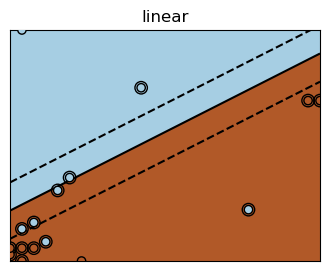

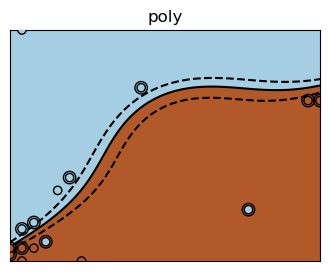

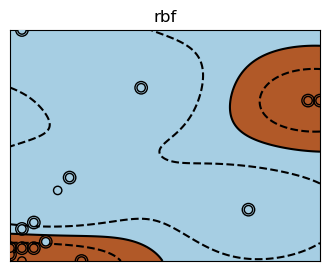

In [50]:
# let's fit the model for different kernels and see the decision boundaries and the hyperplanes
for kernal in ('linear', 'poly', 'rbf'):
    cm = SVC(kernel=kernal, gamma=2)
    cm.fit(X, Y)
    
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.scatter(cm.support_vectors_[:, 0], cm.support_vectors_[
                :, 1], s=80, facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
    
    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = cm.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())

    plt.title(kernal)
    fignum = fignum + 1
plt.show()

[0.73333333 0.86666667 0.76666667 0.9        0.83333333]


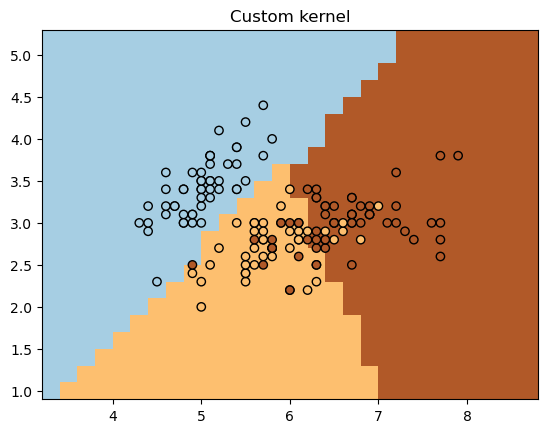

In [58]:
# define a custom kernel on the benchmark Iris dataset
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
iris = load_iris()
X = iris.data[:, :2] # we only take the first two features for visualization
y = iris.target
# We can define a custom kernel function by creating a function that takes two input arrays and returns a scalar value.
# The custom kernel function can be passed to the SVC class using the kernel parameter.
# The custom kernel function can be defined using the numpy library or any other library that supports array operations.
# The custom kernel function can be used to define complex relationships between the input data.
def my_kernel(X, Y):
    M = np.array([[2, 0], [0, 1]])
    return np.dot(np.dot(X, M), Y.T)

# The custom kernel function is defined as the dot product of the input arrays X and Y transposed.
clf = SVC(kernel=my_kernel)
clf.fit(X, y)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)

# plot the decision boundry. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
# The mesh will be generated using the numpy function np.meshgrid.
# We will then classify each point in the mesh using the trained classifier.
# We will also plot the training points.
# The decision boundaries are plotted using the contour function of matplotlib.
# The support vectors are plotted using the scatter function of matplotlib.
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .2), np.arange(y_min, y_max, .2))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.title('Custom kernel')
plt.axis('tight')
plt.show()

In [60]:
## Applying SVM to a real dataset
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split

0.987037037037037
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.96      1.00      0.98        47
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00        55
           4       1.00      0.96      0.98        56
           5       1.00      0.98      0.99        55
           6       1.00      0.98      0.99        51
           7       1.00      0.98      0.99        58
           8       0.97      0.98      0.97        59
           9       0.95      0.98      0.96        56

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



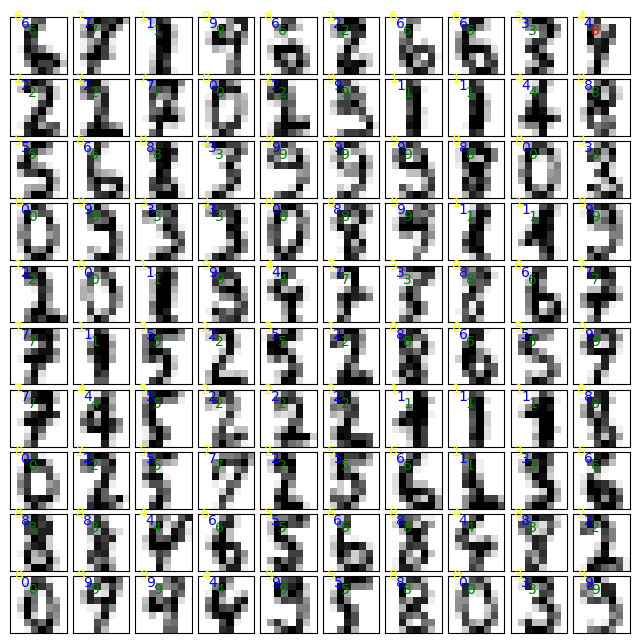

In [77]:
# The following code snippet demonstrates how to apply SVM to a real dataset.
# the first dataset is the handwritten digits dataset from the sklearn library
# load the digits dataset
digits = datasets.load_digits()
# The digits dataset is a collection of 8x8 pixel images of handwritten digits. we will use this dataset to train an SVM model to classify the digits.
# First, we need to transform the images into feature vectors. We can do this by reshaping the images into 64-dimensional arrays.
# We can then use these feature vectors to train an SVM model.
# The following code snippet demonstrates how to train an SVM model on the digits dataset.
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)
# create an SVM classifier
clf = svm.SVC(kernel='rbf')
# train the classifier
clf.fit(X_train, y_train)
# make predictions on the test set
y_pred = clf.predict(X_test)
# evaluate the classifier
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

# plot a comparison of the predicted and actual labels
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='binary')
    ax.text(2, 2, str(y_pred[i]), color='green' if y_pred[i] == y_test[i] else 'red')
    ax.text(0.02, 0.02, str(y_test[i]), color='yellow')
    ax.text(1, 1, str(y_test[i]), color='blue')
    ax.set_xticks([])
    ax.set_yticks([])